# Laboratorio No. 2
## 21001119 Velvet González
## 07140147 José Hernández

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
def contorno_imagen(imagen):
    gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
    gris = cv2.cvtColor(gris, cv2.COLOR_BGR2GRAY)
    #gris = cv2.cvtColor(gris, cv2.COLOR_BGR2RGB)
    gauss = cv2.GaussianBlur(gris, (5,5), 0)
    gauss = cv2.cvtColor(gauss, cv2.COLOR_BGR2RGB)
    a, th = cv2.threshold(gauss,70,210,cv2.THRESH_BINARY)
    canny = cv2.Canny(th, 10, 180)
    (contornos,_) = cv2.findContours(canny.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    original = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
    cv2.drawContours(imagen, contornos, -1, (0, 255, 0), 3)
    canny = cv2.cvtColor(canny, cv2.COLOR_BGR2RGB)
    cv2.drawContours(canny, contornos, -1, (255, 255, 255), 3)
    gauss = cv2.cvtColor(gauss, cv2.COLOR_BGR2RGB)
    cv2.drawContours(gauss, contornos, -1, (0, 255, 0), 3)
    print("Imagen Original")
    plt.imshow(imagen)
    plt.show()
    print("Imagen Gauss")
    plt.imshow(gauss)
    plt.show()
    print("Imagen Canny")
    plt.imshow(canny)
    plt.show()
    name = datetime.now().strftime("%d%b%Y%H%M%S")
    ext = '.jpg'
    cv2.imwrite(name+ext,canny)
    image = cv2.imread(name+ext)
    image2 = cv2.imread(name+ext)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    canny = cv2.Canny(gray, 10,150)
    canny = cv2.dilate(canny, None, iterations=1)
    canny = cv2.erode(canny, None, iterations=1)
    cnts,_ = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for i in range (len(cnts)):
        cv2.drawContours(image, cnts, i, (0, 255, 0), 3)
        print("Contorno papa", "=", len(cnts[i]),"px")
        plt.imshow(image)
        plt.show()
    cnts2,_ = cv2.findContours(canny, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
    for v in range (1):
        cv2.drawContours(image2, cnts2, v, (0, 255, 0), 3)
        print("Contorno Moneda", "=", len(cnts2[v]),'px')
        plt.imshow(image2)
        plt.show()

Imagen Original


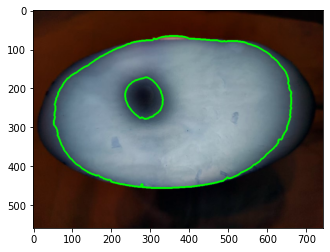

Imagen Gauss


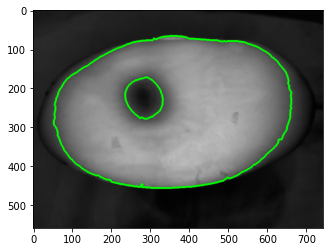

Imagen Canny


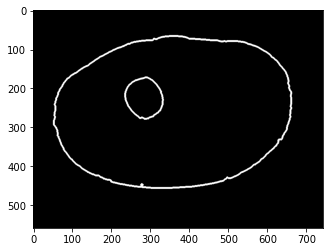

Contorno papa = 741 px


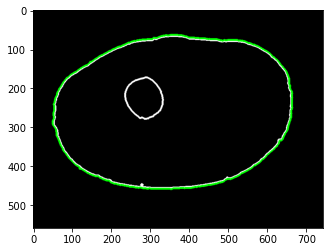

Contorno Moneda = 157 px


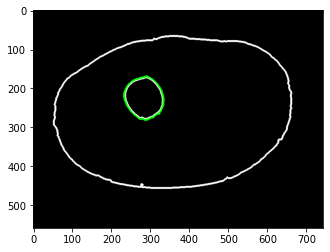

In [3]:
original = cv2.imread("velvet61.jpg",1)
contorno_imagen(original)